In [1]:
import math
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

#%matplotlib inline
clr_palette = ([sns.color_palette("YlGn", 15)[10],sns.cubehelix_palette(8)[6]])

pydice_folder = os.path.dirname(os.getcwd()) + '\\1_Model'
sys.path.append(pydice_folder)

from ema_workbench import (perform_experiments, Model, Policy, Scenario, ReplicatorModel, RealParameter, IntegerParameter, ScalarOutcome, ArrayOutcome, 
                           Constant, ema_logging, SequentialEvaluator, MultiprocessingEvaluator, IpyparallelEvaluator)

from PyRICE_V8 import PyRICE

In [2]:
RICE_POP_gr = pd.read_excel("RICE_2010_base_000.xlsm", sheet_name="Pop_gr")

regions_list = ["US", "OECD-Europe","Japan","Russia","Non-Russia Eurasia","China","India","Middle East","Africa",
    "Latin America","OHI","Other non-OECD Asia"]

"""
####################### Population PARAMETERS and set up dataframe format #######################
"""

#get population growth rates for each region
a=[]
for i in range(31):  
    if i == 0:
        a.append("region")
    k = 2005 + 10 * i
    k = str(k)
    a.append(k)    

region_pop_gr = RICE_POP_gr.iloc[10:22,3:35]
region_pop_gr.columns =  a
region_pop_gr = region_pop_gr.set_index('region') 

In [3]:
model = PyRICE(model_specification="EMA",welfare_function = "egalitarian")
model()

{'Damages 2005': 0.08727238922982072,
 'Damages 2025': 0.48744936122100474,
 'Damages 2045': 1.5544662596814387,
 'Damages 2065': 3.6549775298027467,
 'Damages 2085': 6.992234885376134,
 'Damages 2105': 11.597155192362465,
 'Damages 2125': 17.02334223539783,
 'Damages 2145': 22.592964172502057,
 'Damages 2165': 28.047047678887196,
 'Damages 2185': 33.72714076102554,
 'Damages 2205': 40.00443101014845,
 'Damages 2225': 47.60403048676049,
 'Damages 2245': 56.41813647625502,
 'Damages 2265': 66.40958102976076,
 'Damages 2285': 77.62479385111446,
 'Damages 2305': 89.94803719673935,
 'Utility 2005': -1070.6545235875724,
 'Utility 2025': 2010.102119198809,
 'Utility 2045': 4936.815445261641,
 'Utility 2065': 7511.5701215403515,
 'Utility 2085': 9537.788049840146,
 'Utility 2105': 11211.703809886421,
 'Utility 2125': 12552.09087577257,
 'Utility 2145': 13451.53810586501,
 'Utility 2165': 14085.417077317281,
 'Utility 2185': 14529.330295789387,
 'Utility 2205': 14912.828060824553,
 'Utility 22

In [4]:
all_policies = pd.read_csv("example_policys_principles.csv",index_col=0)

total_policy_list = []
principles_list =["utilitarian","prioritarian","egalitarian","sufficitarian"]

for principle in principles_list:
    policies = all_policies[all_policies['principle']==principle]
    policies = policies.dropna(axis='columns')
    policies = policies.iloc[:,:-1]
    policy_list_principle = []

    #get list of policies as input for uncertainty sampling
    for i in range(0,len(policies)):
        policy_dict = policies.iloc[i].to_dict()
        policy_list_principle.append(Policy(policies.index[i], **policy_dict)) 
    total_policy_list.append(policy_list_principle)

In [5]:
#set up dataframes for outcomes
output_worst_off_income_class = pd.DataFrame(index =region_pop_gr.columns )
output_worst_off_climate_impact = pd.DataFrame(index =region_pop_gr.columns)
output_population_under_treshold =  pd.DataFrame(index =region_pop_gr.columns)
output_max_utility_distance_treshold = pd.DataFrame(index =region_pop_gr.columns)
output_intertemporal_utility_gini = pd.DataFrame(index =region_pop_gr.columns)
output_intertemporal_impact_gini = pd.DataFrame(index =region_pop_gr.columns)
output_climate_impact_per_dollar_gini = pd.DataFrame(index =region_pop_gr.columns)
output_utility_intra_gini = pd.DataFrame(index =region_pop_gr.columns)
output_regional_miu = pd.DataFrame(index =region_pop_gr.columns)
output_label =pd.DataFrame(index =region_pop_gr.columns)

output_Y = pd.DataFrame(index =region_pop_gr.columns)
output_E = pd.DataFrame(index =region_pop_gr.columns)
output_U = pd.DataFrame(index =region_pop_gr.columns)
output_D = pd.DataFrame(index =region_pop_gr.columns)
output_T = pd.DataFrame(index =region_pop_gr.columns)

control_sr  = pd.DataFrame(index =region_pop_gr.columns)
control_miu_period  = pd.DataFrame(index =region_pop_gr.columns)
control_irstp  = pd.DataFrame(index =region_pop_gr.columns)

In [6]:
model = PyRICE(model_specification="Validation_1",welfare_function="utilitarian")
model()

{'Damages 2005': 0.08727238922982072,
 'Damages 2025': 0.4877282157913135,
 'Damages 2045': 1.5232311672072747,
 'Damages 2065': 3.5175678607116505,
 'Damages 2085': 6.717211591406936,
 'Damages 2105': 11.175664064494374,
 'Damages 2125': 16.455570144974466,
 'Damages 2145': 21.837661275189934,
 'Damages 2165': 27.1228898149715,
 'Damages 2185': 32.566044397035405,
 'Damages 2205': 38.55062771265007,
 'Damages 2225': 45.79087701979286,
 'Damages 2245': 54.18563460495428,
 'Damages 2265': 63.70068433371659,
 'Damages 2285': 74.38064691486946,
 'Damages 2305': 86.11623196580402,
 'Utility 2005': -1070.6545235875724,
 'Utility 2025': 1539.0402610200379,
 'Utility 2045': 2763.662768275073,
 'Utility 2065': 3067.7512572020196,
 'Utility 2085': 2882.520495278065,
 'Utility 2105': 2518.327484336899,
 'Utility 2125': 2093.747015539495,
 'Utility 2145': 1668.3179380086353,
 'Utility 2165': 1297.7043646919105,
 'Utility 2185': 994.1914172754044,
 'Utility 2205': 757.8127956448534,
 'Utility 2225

In [7]:
nordhaus_policy = pd.read_excel("results_nordhaus_policy.xlsx")
nordhaus_policy = nordhaus_policy.drop(nordhaus_policy.columns[0], axis=1)

nordhaus_policy_controls = nordhaus_policy.iloc[:,30:33]
for i in range (0,len(nordhaus_policy_controls)):
    nordhaus_policy_dict = nordhaus_policy_controls.iloc[i].to_dict()
nordhaus_policy_dict['miu_period']

13.0

In [8]:
output_worst_off_income_class = pd.DataFrame(index =region_pop_gr.columns )
output_worst_off_climate_impact = pd.DataFrame(index =region_pop_gr.columns)
output_population_under_treshold =  pd.DataFrame(index =region_pop_gr.columns)
output_max_utility_distance_treshold = pd.DataFrame(index =region_pop_gr.columns)
output_intertemporal_utility_gini = pd.DataFrame(index =region_pop_gr.columns)
output_intertemporal_impact_gini = pd.DataFrame(index =region_pop_gr.columns)
output_climate_impact_per_dollar_gini = pd.DataFrame(index =region_pop_gr.columns)
output_utility_intra_gini = pd.DataFrame(index =region_pop_gr.columns)
output_regional_miu = pd.DataFrame(index =region_pop_gr.columns)
output_label =pd.DataFrame(index =region_pop_gr.columns)

output_Y = pd.DataFrame(index =region_pop_gr.columns)
output_E = pd.DataFrame(index =region_pop_gr.columns)
output_U = pd.DataFrame(index =region_pop_gr.columns)
output_U_agg = pd.DataFrame(index =region_pop_gr.columns)
output_D = pd.DataFrame(index =region_pop_gr.columns)
output_T = pd.DataFrame(index =region_pop_gr.columns)

control_sr  = pd.DataFrame(index =region_pop_gr.columns)
control_miu_period  = pd.DataFrame(index =region_pop_gr.columns)
control_irstp  = pd.DataFrame(index =region_pop_gr.columns)

outcomes_dict = {}

principle_code = ["util","prior","egal","suff"]

for principle in range(0,5):
    if principle != 4:
        strategies_list = total_policy_list[principle]
        model = PyRICE(model_specification="EMA",welfare_function=principles_list[principle])

        for policy in strategies_list:              
            if principle == 0:
                model(sr = policy['sr'], miu_period=policy['miu_period'],irstp = policy['irstp'])
            if principle == 1:
                model(sr = policy['sr'], miu_period=policy['miu_period'],irstp = policy['irstp'],
                  growth_factor_prio =  policy['growth_factor_prio'],  prioritarian_discounting = policy['prioritarian_discounting'])
            if principle == 2:
                model(sr = policy['sr'], miu_period=policy['miu_period'],irstp = policy['irstp'],
                      egalitarian_discounting = policy['egalitarian_discounting'])
            if principle == 3:
                model(sr = policy['sr'], miu_period=policy['miu_period'],irstp = policy['irstp'],
                      growth_factor_suf =  policy['sufficitarian growth factor'],  
                      sufficitarian_discounting = policy['sufficitarian_discounting'],
                      ini_suf_treshold= policy['treshold level'])
            run_name = principle_code[principle] + "-" + policy.name

            #standard output
            output_Y[run_name]  = model.global_ouput
            output_E[run_name] = model.E_worldwilde_per_year
            output_U[run_name] = model.global_per_util_ww
            output_D[run_name] = model.global_damages
            output_T[run_name] = model.temp_atm
            output_U_agg[run_name] = model.utility

            #alternative objectives
            output_worst_off_income_class[run_name] = model.worst_off_income_class
            output_worst_off_climate_impact[run_name] = model.worst_off_climate_impact
            output_population_under_treshold[run_name] =  model.population_under_treshold
            output_max_utility_distance_treshold[run_name] = model.max_utility_distance_treshold
            output_intertemporal_utility_gini[run_name] = model.intertemporal_utility_gini
            output_intertemporal_impact_gini[run_name] = model.intertemporal_impact_gini 
            output_climate_impact_per_dollar_gini[run_name] = model.climate_impact_per_dollar_gini
            output_utility_intra_gini[run_name] = model.CPC_intra_gini

            #get average MUI
            for region in range(0,12):
                run_name_region = principles_list[principle] + "-" + policy.name + "-"+ str(region)
                output_regional_miu[run_name_region]  = model.miu[region]
    if principle == 4:
        model = PyRICE(model_specification="Validation_1",welfare_function="utilitarian")
        model(sr = nordhaus_policy_dict['sr'], miu_period=nordhaus_policy_dict['miu_period'],irstp = nordhaus_policy_dict['irstp'])
        
        run_name = "nordhaus_policy"
        #standard output
        output_Y[run_name]  = model.global_ouput
        output_E[run_name] = model.E_worldwilde_per_year
        output_U[run_name] = model.global_per_util_ww
        output_D[run_name] = model.global_damages
        output_T[run_name] = model.temp_atm
        output_U_agg[run_name] = model.utility

        #alternative objectives
        output_worst_off_income_class[run_name] = model.worst_off_income_class
        output_worst_off_climate_impact[run_name] = model.worst_off_climate_impact
        output_population_under_treshold[run_name] =  model.population_under_treshold
        output_max_utility_distance_treshold[run_name] = model.max_utility_distance_treshold
        output_intertemporal_utility_gini[run_name] = model.intertemporal_utility_gini
        output_intertemporal_impact_gini[run_name] = model.intertemporal_impact_gini 
        output_climate_impact_per_dollar_gini[run_name] = model.climate_impact_per_dollar_gini
        output_utility_intra_gini[run_name] = model.CPC_intra_gini
        
        for region in range(0,12):
            run_name_region = "nordhaus_policy" + "-" + str(region)
            output_regional_miu[run_name_region]  = model.miu[region]
outcomes_dict["Aggregated utility"] = output_U_agg
outcomes_dict["MIU"] = output_regional_miu
outcomes_dict["Worst of income class"] = output_worst_off_income_class
outcomes_dict["Worst of climate impact"] = output_worst_off_climate_impact
outcomes_dict["Population under sufficitarian treshold"] = output_population_under_treshold
outcomes_dict["Maximum distance to treshold"] = output_max_utility_distance_treshold
outcomes_dict["Gini of intertemporal consumption"] = output_intertemporal_utility_gini
outcomes_dict["Gini of intertemporal climate impact"] = output_intertemporal_impact_gini
outcomes_dict["Gini of intratemporal impact relative to consumption"] = output_climate_impact_per_dollar_gini
outcomes_dict["Gini of intratemporal consumption"] = output_utility_intra_gini
outcomes_dict["World aggregated yearly output"] = output_Y
outcomes_dict["World aggregated yearly emissions"] = output_E
outcomes_dict["World aggregated yearly period utility"] = output_U
outcomes_dict["World aggregated yearly damages"] = output_D
outcomes_dict["Global atmospheric temperature increase"] = output_T

In [9]:
average_miu_timestep = pd.DataFrame(index =region_pop_gr.columns , columns = outcomes_dict["World aggregated yearly damages"].columns)

regional_miu = outcomes_dict["MIU"] 

for row in range(0,31):
    i = 0
    j = 11
    for policies in range(0,30):
        policy_name =  outcomes_dict["Global atmospheric temperature increase"].columns[policies]
        mean_miu = regional_miu.iloc[row,i:j].mean()
        average_miu_timestep.iloc[row,policies] = mean_miu
        i = i + 12
        j = j + 12

        average_miu_timestep

outcomes_dict['average regional MIU'] = average_miu_timestep

In [10]:
outcomes_dict["World aggregated yearly output"] = output_Y
outcomes_dict["World aggregated yearly emissions"] = output_E

In [11]:
general_list = ["World aggregated yearly output","Global atmospheric temperature increase",
                "World aggregated yearly emissions","World aggregated yearly damages"]

objective_list = ['Aggregated utility', 'Worst of income class', 'Worst of climate impact', 
                  'Population under sufficitarian treshold', 'Maximum distance to treshold',  
                  'Gini of intratemporal impact relative to consumption', 'Gini of intratemporal consumption', 
                  'World aggregated yearly period utility']

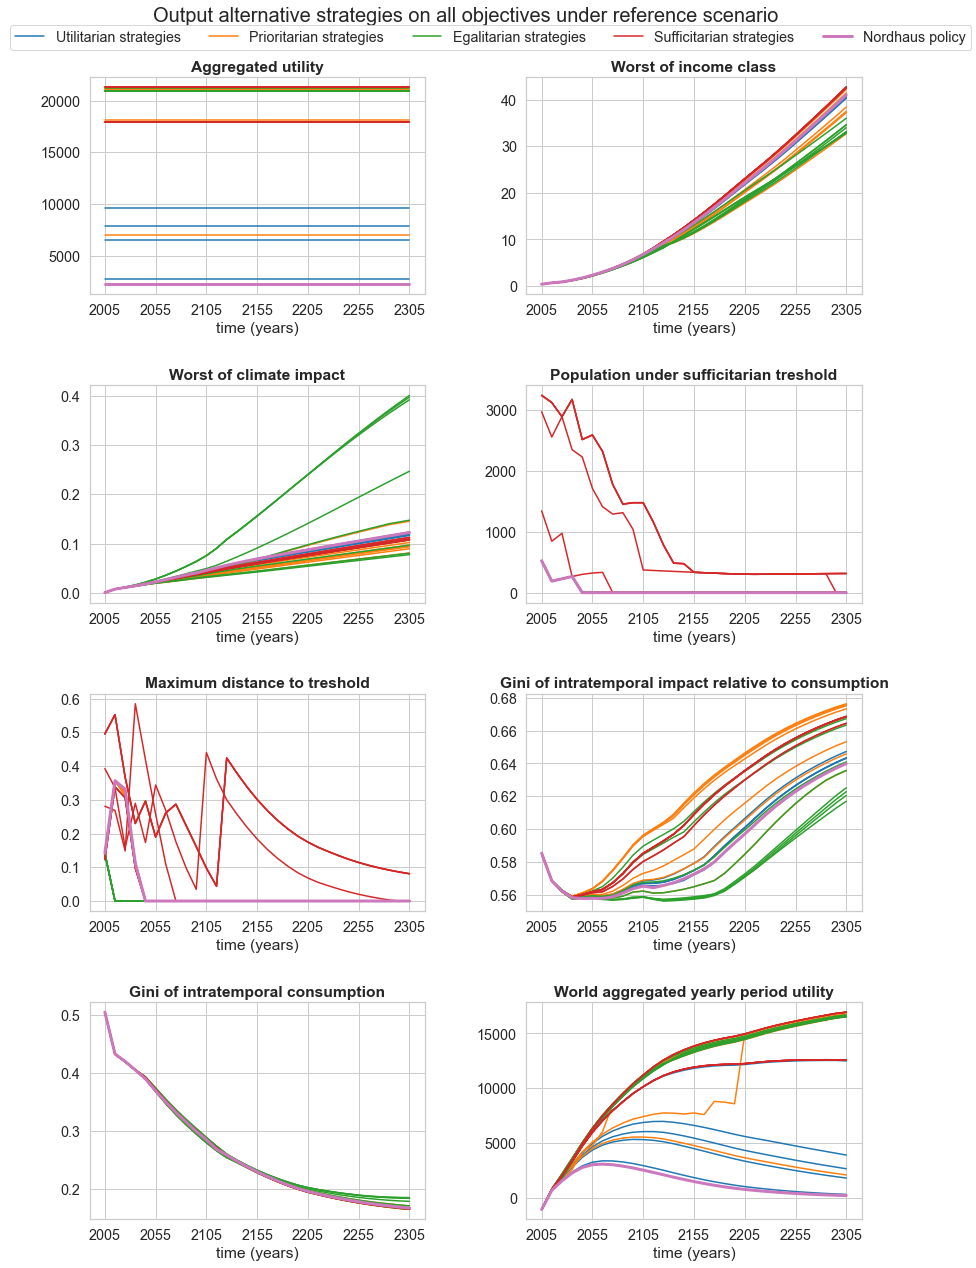

In [12]:
sns.set(font_scale=1.30)  # crazy big
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(13, 18),constrained_layout=False)
fig.tight_layout(pad=4.0)

fig.suptitle("Output alternative strategies on all objectives under reference scenario", fontsize=20,y=1.002)
#fig.subplots_adjust(hspace=1, wspace=0.2)

line_labels = ["utilitarian strategies", "prioritarian strategies", "egalitarian strategies", "sufficitarian strategies"]

index_1 = [0,0,1,1,2,2,3,3,4,4]
index_2 = [0,1,0,1,0,1,0,1,0,1]
position = 0

lines = []
labels = []

for i in objective_list:  
    data_sub_plot = outcomes_dict[i]
        
    for policy_index in range(0,30):      
        if policy_index == 0: 
            if data_sub_plot.columns[policy_index][0:4] == "util":
                color = sns.color_palette("tab10")[0]
                label = "Utilitarian strategies"
            if data_sub_plot.columns[policy_index][0:4] == "prio":
                color = sns.color_palette("tab10")[1]
                label = "Prioritarian strategies"                
            if data_sub_plot.columns[policy_index][0:4] == "egal":
                color = sns.color_palette("tab10")[2]
                label = "Egalitarian strategies"                
            if data_sub_plot.columns[policy_index][0:4] == "suff":
                color = sns.color_palette("tab10")[3]
                label = "Sufficitarian strategies"                
            
            data_sub_plot.iloc[:,policy_index].plot(ax=axes[index_1[position],index_2[position]],color = color,label = label); 
            axes[index_1[position],index_2[position]].set_title(i,fontweight="bold"),
            axes[index_1[position],index_2[position]].set(xlabel='time (years)')
        if 0 < policy_index < 29:
            if data_sub_plot.columns[policy_index][0:4] == "util":
                color = sns.color_palette("tab10")[0]
                label = "Utilitarian strategies"
            if data_sub_plot.columns[policy_index][0:4] == "prio":
                color = sns.color_palette("tab10")[1]
                label = "Prioritarian strategies"                
            if data_sub_plot.columns[policy_index][0:4] == "egal":
                color = sns.color_palette("tab10")[2]
                label = "Egalitarian strategies"                
            if data_sub_plot.columns[policy_index][0:4] == "suff":
                color = sns.color_palette("tab10")[3]
                label = "Sufficitarian strategies"   
            
            data_sub_plot.iloc[:,policy_index].plot(ax=axes[index_1[position],index_2[position]],color = color,label = label,secondary_y=False)
        if policy_index == 29:
            color = sns.color_palette("colorblind")[4]
            label = "Nordhaus policy"
            
            data_sub_plot.iloc[:,policy_index].plot(ax=axes[index_1[position],index_2[position]],color = color,label = label,linewidth = 3,secondary_y=False)

    
    position = position + 1


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc = (0.01, 0.96),ncol=5)


In [13]:
list(outcomes_dict.keys())[0:16]

outcomes =  ['Aggregated utility',
             'World aggregated yearly period utility',
             'Worst of income class',
             'Worst of climate impact',
             'Population under sufficitarian treshold',
             'Maximum distance to treshold',
             'Gini of intertemporal consumption',
             'Gini of intertemporal climate impact',
             'Gini of intratemporal impact relative to consumption',
             'Gini of intratemporal consumption',
             'World aggregated yearly output',
             'World aggregated yearly emissions',
             'World aggregated yearly damages',
             'Global atmospheric temperature increase',
             'average regional MIU']

Aggregated utility
World aggregated yearly period utility
Worst of income class
Worst of climate impact
Population under sufficitarian treshold
Maximum distance to treshold
Gini of intertemporal consumption
Gini of intertemporal climate impact
Gini of intratemporal impact relative to consumption
Gini of intratemporal consumption
World aggregated yearly output
World aggregated yearly emissions
World aggregated yearly damages
Global atmospheric temperature increase
average regional MIU


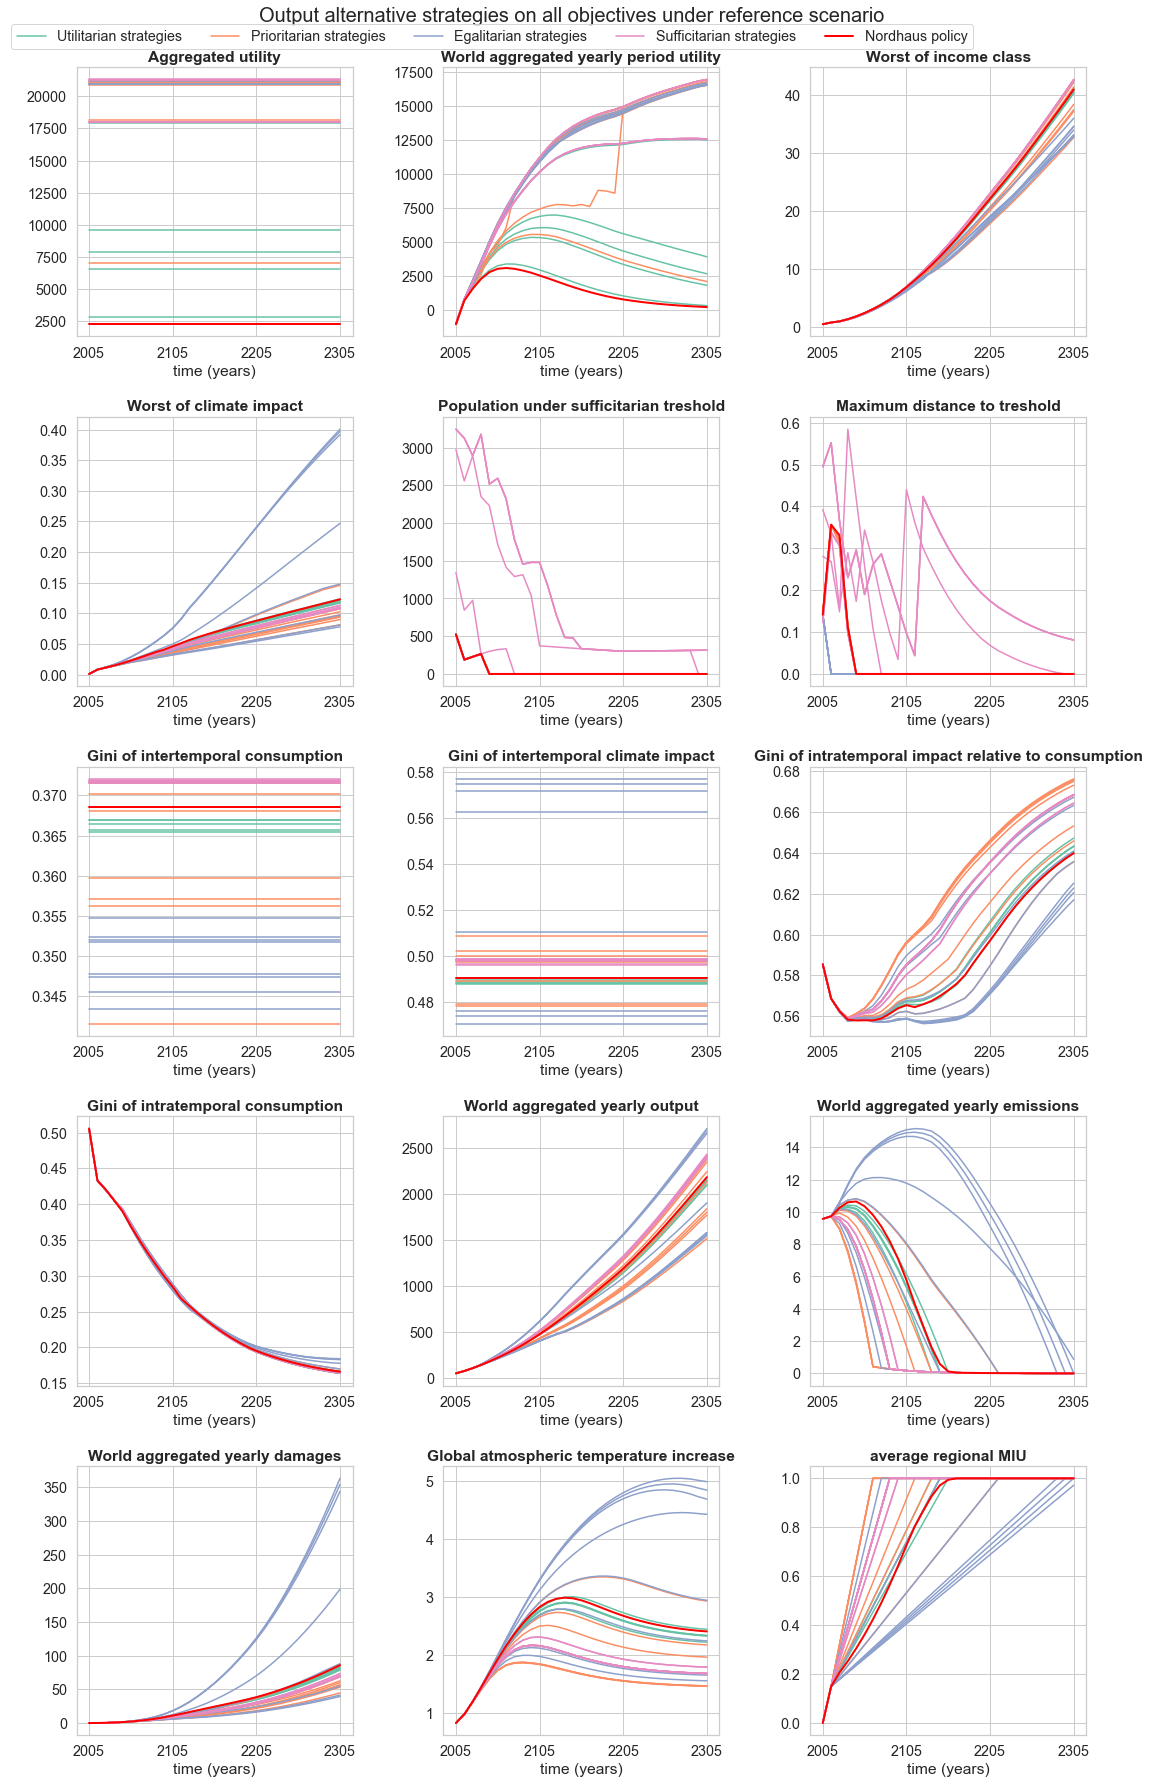

In [14]:
sns.set(font_scale=1.30)  # crazy big
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 25),constrained_layout=False)
fig.tight_layout(pad=3.3)

#fig.delaxes(axes[4][2])

fig.suptitle("Output alternative strategies on all objectives under reference scenario", fontsize=20,y=1.002)
#fig.subplots_adjust(hspace=1, wspace=0.2)

line_labels = ["utilitarian strategies", "prioritarian strategies", "egalitarian strategies", "sufficitarian strategies"]

index_1 = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4]
index_2 = [0,1,2,0,1,2,0,1,2,0,1,2,0,1,2]
position = 0

lines = []
labels = []

for i in outcomes:
    print(i)
    data_sub_plot = outcomes_dict[i]
    for policy_index in range(0,30): 
        if policy_index == 0: 
            if data_sub_plot.columns[policy_index][0:4] == "util":
                color = sns.color_palette("Set2")[0]
                label = "Utilitarian strategies"
            if data_sub_plot.columns[policy_index][0:4] == "prio":
                color = sns.color_palette("Set2")[1]
                label = "Prioritarian strategies"                
            if data_sub_plot.columns[policy_index][0:4] == "egal":
                color = sns.color_palette("Set2")[2]
                label = "Egalitarian strategies"                
            if data_sub_plot.columns[policy_index][0:4] == "suff":
                color = sns.color_palette("Set2")[3]
                label = "Sufficitarian strategies"                
            
            data_sub_plot.iloc[:,policy_index].plot(ax=axes[index_1[position],index_2[position]],color = color,label = label); 
            axes[index_1[position],index_2[position]].set_title(i,fontweight="bold"),
            axes[index_1[position],index_2[position]].set(xlabel='time (years)')
        if 0 < policy_index < 29:
            if data_sub_plot.columns[policy_index][0:4] == "util":
                color = sns.color_palette("Set2")[0]
                label = "Utilitarian strategies"
            if data_sub_plot.columns[policy_index][0:4] == "prio":
                color = sns.color_palette("Set2")[1]
                label = "Prioritarian strategies"                
            if data_sub_plot.columns[policy_index][0:4] == "egal":
                color = sns.color_palette("Set2")[2]
                label = "Egalitarian strategies"                
            if data_sub_plot.columns[policy_index][0:4] == "suff":
                color = sns.color_palette("Set2")[3]
                label = "Sufficitarian strategies"   
            
            data_sub_plot.iloc[:,policy_index].plot(ax=axes[index_1[position],index_2[position]],color = color,label = label,secondary_y=False)
        if policy_index == 29:
            color = "red"
            label = "Nordhaus policy"
            
            data_sub_plot.iloc[:,policy_index].plot(ax=axes[index_1[position],index_2[position]],color = color,label = label,linewidth = 2,secondary_y=False)

    position = position + 1

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),loc = (0.01, 0.972),ncol=5)
fig.savefig('Behaviour of strategies under the base case.png', bbox_inches='tight',dpi=200)

## La montagne like plots

In [30]:
outcome_miu_stacked = outcomes_dict['average regional MIU'].stack().to_frame().reset_index()
outcome_miu_stacked.columns = ["year","policy",'Emission control rate']
outcome_miu_stacked['principle'] = outcome_miu_stacked['policy'].str[:4]
outcome_miu_stacked = outcome_miu_stacked.astype({'year': float, 'policy': str, 'Emission control rate': float,'principle':str})

In [31]:
mapping = {"util":"Utilitarian","suff": "Sufficitarian",
           "prio":"Prioritarian","egal":"Egalitarian","nord":"Nordhaus policy"}
outcome_miu_stacked = outcome_miu_stacked.replace({"principle": mapping})
outcome_miu_stacked.columns = ["Year","policy","Emission control rate","Strategy principle"]

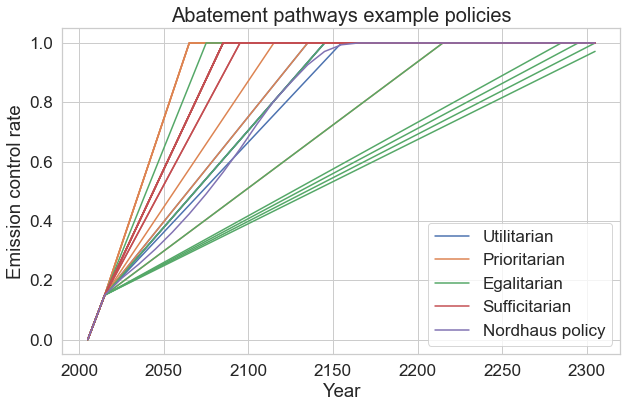

In [32]:
sns.set(font_scale=1.55)  # crazy big
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

#plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="Year", y="Emission control rate",hue = "Strategy principle",units="policy",estimator=None,
                  data=outcome_miu_stacked)
legend = ax.legend()
legend.texts[0].set_text("Whatever else")


plt.title("Abatement pathways example policies", fontsize=20)

plt.legend()
plt.show()

ax.figure.savefig('abatement pathways example policies', bbox_inches='tight',dpi=220)


In [18]:
outcome_total_damages_stacked = outcomes_dict['World aggregated yearly damages'].stack().to_frame().reset_index()
outcome_total_damages_stacked.columns = ["year","policy",'World aggregated yearly damages']
outcome_total_damages_stacked['principle'] = outcome_total_damages_stacked['policy'].str[:4]
outcome_total_damages_stacked = outcome_total_damages_stacked.astype({'year': float, 'policy': str, 'World aggregated yearly damages': float,'principle':str})

outcome_temp = outcomes_dict['Global atmospheric temperature increase'].stack().to_frame().reset_index()
outcome_temp.columns = ["year","policy",'Global atmospheric temperature increase']
outcome_temp['principle'] = outcome_temp['policy'].str[:4]
outcome_temp = outcome_temp.astype({'year': float, 'policy': str, 'Global atmospheric temperature increase': float,'principle':str})

outcome_temp = outcome_temp.iloc[:,0:3]
outcome_temp = outcome_temp.astype({ 'policy': str})
outcome_miu_stacked_merge = outcome_miu_stacked.iloc[:,0:3]
outcome_miu_stacked_merge = outcome_miu_stacked_merge.astype({ 'policy': str})

output_temp_miu = pd.merge(outcome_miu_stacked_merge, outcome_temp, on=['policy','year'])

In [18]:
output = pd.merge(outcome_total_damages_stacked, output_temp_miu, on=['policy','year'])
output

,year,policy,World aggregated yearly damages,principle,Emission control rate,Global atmospheric temperature increase
0,2005.0,util-policy370,0.087272,util,0.00042,0.830000
1,2005.0,util-policy132,0.087272,util,0.00042,0.830000
2,2005.0,util-policy79,0.087272,util,0.00042,0.830000
3,2005.0,util-policy417,0.087272,util,0.00042,0.830000
4,2005.0,util-policy857,0.087272,util,0.00042,0.830000
...,...,...,...,...,...,...
925,2305.0,suff-policy6,70.149227,suff,1.00000,1.682892
926,2305.0,suff-policy35,70.604634,suff,1.00000,1.683411
927,2305.0,suff-policy13,73.699277,suff,1.00000,1.792437
928,2305.0,suff-policy11,73.458713,suff,1.00000,1.792078


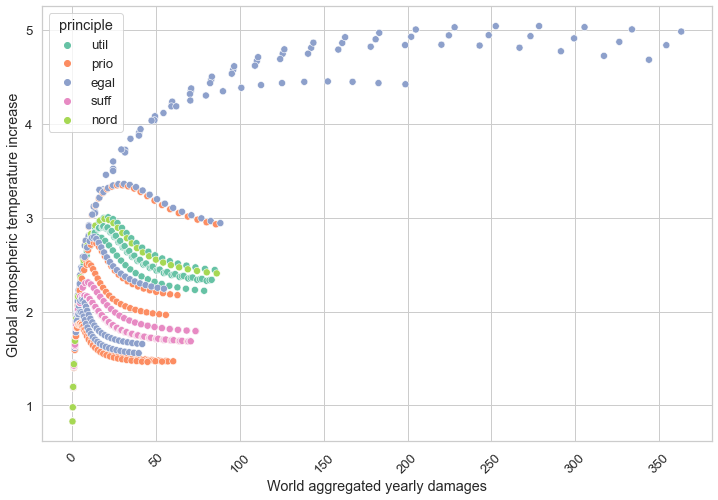

In [19]:
sns.set(font_scale=1.2)  # crazy big
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
ax = sns.scatterplot(y='Global atmospheric temperature increase', x="World aggregated yearly damages",s=50, hue="principle", palette='Set2', data=output)

#ax.plot(nordhaus_miu.year, nordhaus_miu['value'], color='black',linewidth=3,label = "nordhaus optimal policy")

#norm = plt.Normalize(df_merged["emission control rate target year"].min(), df_merged["emission control rate target year"].max())
#sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
#sm.set_array([])

# Remove the legend and add a colorbar
#ax.get_legend().remove()
#ax.figure.colorbar(sm)

plt.show()

## principle objectives over time

### 1 Prioritarian objectives

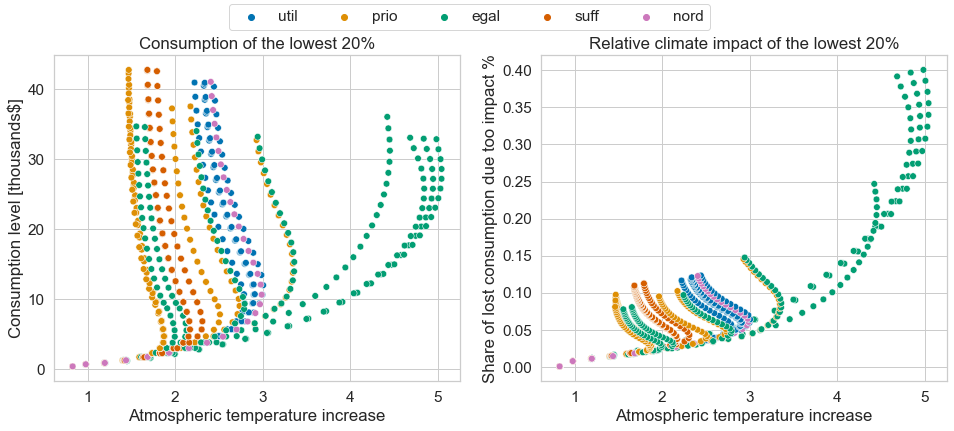

In [32]:
#give input vars for plot
input_vars=["Global atmospheric temperature increase","Worst of climate impact","Worst of income class"]

total_outcomes = outcome_miu_stacked

for i in input_vars:
    outcome_stacked_df = outcomes_dict[i].stack().to_frame().reset_index()
    outcome_stacked_df.columns = ["year","policy",i]
    outcome_stacked_df['principle'] = outcome_stacked_df['policy'].str[:4]
    outcome_stacked_df = outcome_stacked_df.astype({'year': float, 'policy': str, i: float,'principle':str})
    outcome_stacked_df = outcome_stacked_df.iloc[:,0:3]

    total_outcomes = pd.merge(total_outcomes, outcome_stacked_df, on=['policy','year'])

sns.set(font_scale=1.4)  # crazy big
sns.set_style("whitegrid")

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,6))
ax1.set_title('Consumption of the lowest 20%')
sns.scatterplot(x="Global atmospheric temperature increase", y="Worst of income class",s=45, hue="principle", palette='colorblind',data=total_outcomes, ax=ax1)
ax1.set(xlabel='Atmospheric temperature increase', ylabel='Consumption level [thousands$]')

ax2.set_title('Relative climate impact of the lowest 20%')
sns.scatterplot(x="Global atmospheric temperature increase", y="Worst of climate impact",s=45, hue="principle", palette='colorblind',data=total_outcomes, ax=ax2)
ax2.set(xlabel='Atmospheric temperature increase', ylabel='Share of lost consumption due too impact %')

ax1.get_legend().remove()
ax2.get_legend().remove()

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
lgd= fig.legend(by_label.values(), by_label.keys(),loc = (0.24, 0.93),ncol=6)

fig.savefig('Outcomes prioritarian objectives reference scenario', bbox_extra_artists=(lgd,), bbox_inches='tight')

### 2 Sufficitarian objectives

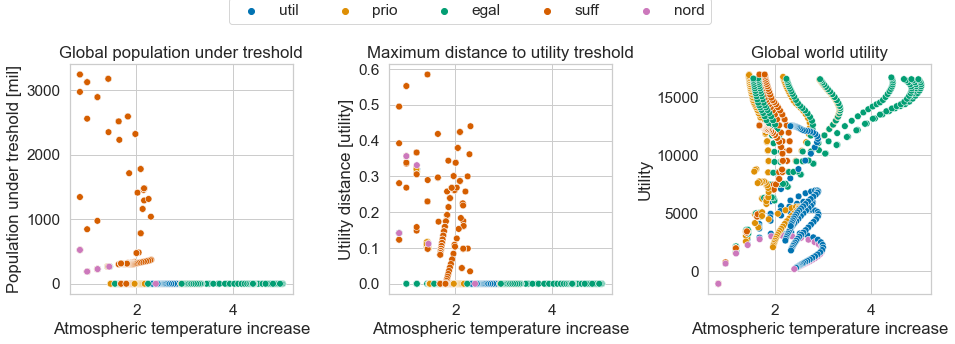

In [33]:
#give input vars for plot
input_vars=["Global atmospheric temperature increase","Population under sufficitarian treshold","Maximum distance to treshold","World aggregated yearly period utility"]

total_outcomes = outcome_miu_stacked

for i in input_vars:
    outcome_stacked_df = outcomes_dict[i].stack().to_frame().reset_index()
    outcome_stacked_df.columns = ["year","policy",i]
    outcome_stacked_df['principle'] = outcome_stacked_df['policy'].str[:4]
    outcome_stacked_df = outcome_stacked_df.astype({'year': float, 'policy': str, i: float,'principle':str})
    outcome_stacked_df = outcome_stacked_df.iloc[:,0:3]

    total_outcomes = pd.merge(total_outcomes, outcome_stacked_df, on=['policy','year'])
sns.set(font_scale=1.4)  # crazy big
sns.set_style("whitegrid")

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
fig.tight_layout(pad=3.0)

ax1.set_title('Global population under treshold')
sns.scatterplot(x="Global atmospheric temperature increase", y="Population under sufficitarian treshold",s=45, hue="principle", palette='colorblind',data=total_outcomes, ax=ax1)
ax1.set(xlabel='Atmospheric temperature increase', ylabel='Population under treshold [mil]')

ax2.set_title('Maximum distance to utility treshold')
sns.scatterplot(x="Global atmospheric temperature increase", y="Maximum distance to treshold",s=45, hue="principle", palette='colorblind',data=total_outcomes, ax=ax2)
ax2.set(xlabel='Atmospheric temperature increase', ylabel='Utility distance [utility]')

ax3.set_title('Global world utility')
sns.scatterplot(x="Global atmospheric temperature increase", y="World aggregated yearly period utility",s=45, hue="principle", palette='colorblind',data=total_outcomes, ax=ax3)
ax3.set(xlabel='Atmospheric temperature increase', ylabel='Utility')

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
lgd= fig.legend(by_label.values(), by_label.keys(),loc = (0.24, 0.93),ncol=6)

fig.savefig('Outcomes sufficitarian objectives reference scenario', bbox_extra_artists=(lgd,), bbox_inches='tight')


### 3 Egalitarian objectives

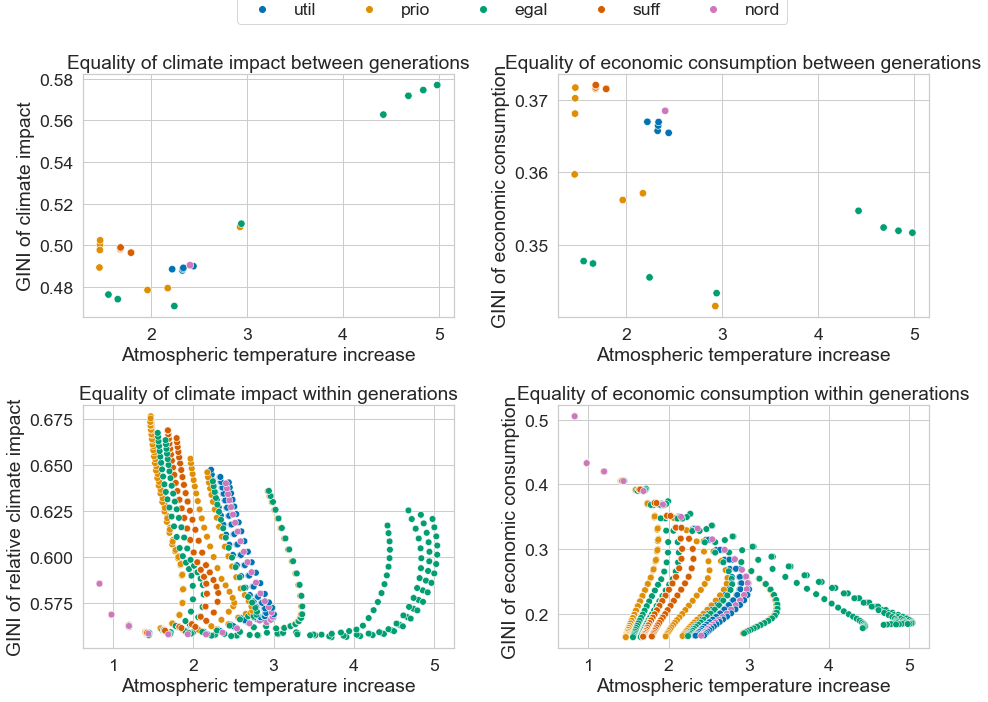

In [36]:
#give input vars for plot
input_vars=["Global atmospheric temperature increase","Gini of intertemporal climate impact",
            "Gini of intratemporal impact relative to consumption","Gini of intertemporal consumption",
            "Gini of intratemporal consumption"]

total_outcomes = outcome_miu_stacked

for i in input_vars:
    outcome_stacked_df = outcomes_dict[i].stack().to_frame().reset_index()
    outcome_stacked_df.columns = ["year","policy",i]
    outcome_stacked_df['principle'] = outcome_stacked_df['policy'].str[:4]
    outcome_stacked_df = outcome_stacked_df.astype({'year': float, 'policy': str, i: float,'principle':str})
    outcome_stacked_df = outcome_stacked_df.iloc[:,0:3]

    total_outcomes = pd.merge(total_outcomes, outcome_stacked_df, on=['policy','year'])
sns.set(font_scale=1.6)  # crazy big
sns.set_style("whitegrid")

fig, (ax1,ax2) = plt.subplots(2,2, figsize=(14,10))
fig.tight_layout(pad=3.0)

ax1[0].set_title('Equality of climate impact between generations')
sns.scatterplot(x="Global atmospheric temperature increase", y="Gini of intertemporal climate impact",s=55, 
                hue="principle", palette='colorblind',data=total_outcomes[total_outcomes["year"]==2305], ax=ax1[0])
ax1[0].set(xlabel='Atmospheric temperature increase', ylabel='GINI of climate impact')

ax1[1].set_title('Equality of economic consumption between generations')
sns.scatterplot(x="Global atmospheric temperature increase", y="Gini of intertemporal consumption",s=55, 
                hue="principle", palette='colorblind',data=total_outcomes[total_outcomes["year"]==2305], ax=ax1[1])
ax1[1].set(xlabel='Atmospheric temperature increase', ylabel='GINI of economic consumption')

ax2[0].set_title('Equality of climate impact within generations')
sns.scatterplot(x="Global atmospheric temperature increase", y="Gini of intratemporal impact relative to consumption",s=45, 
                hue="principle", palette='colorblind',data=total_outcomes, ax=ax2[0])
ax2[0].set(xlabel='Atmospheric temperature increase', ylabel='GINI of relative climate impact')

ax2[1].set_title('Equality of economic consumption within generations')
sns.scatterplot(x="Global atmospheric temperature increase", y="Gini of intratemporal consumption",
                s=45, hue="principle", palette='colorblind',data=total_outcomes, ax=ax2[1])
ax2[1].set(xlabel='Atmospheric temperature increase', ylabel='GINI of economic consumption')


ax1[0].get_legend().remove()
ax1[1].get_legend().remove()
ax2[0].get_legend().remove()
ax2[1].get_legend().remove()


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
lgd= fig.legend(by_label.values(), by_label.keys(),loc = (0.24, 0.965),ncol=6)

fig.savefig('Outcomes egalitarian objectives reference scenario', bbox_extra_artists=(lgd,), bbox_inches='tight')


# 4 Utilitarian objectives

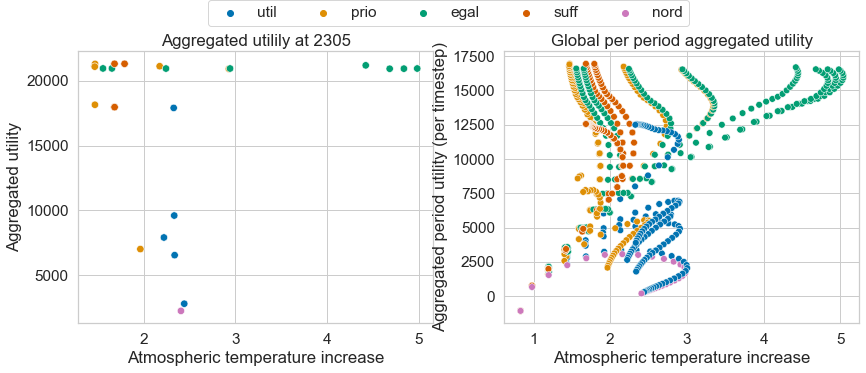

In [35]:
#give input vars for plot
input_vars=["Aggregated utility","World aggregated yearly period utility","Global atmospheric temperature increase"]

total_outcomes = outcome_miu_stacked

for i in input_vars:
    outcome_stacked_df = outcomes_dict[i].stack().to_frame().reset_index()
    outcome_stacked_df.columns = ["year","policy",i]
    outcome_stacked_df['principle'] = outcome_stacked_df['policy'].str[:4]
    outcome_stacked_df = outcome_stacked_df.astype({'year': float, 'policy': str, i: float,'principle':str})
    outcome_stacked_df = outcome_stacked_df.iloc[:,0:3]

    total_outcomes = pd.merge(total_outcomes, outcome_stacked_df, on=['policy','year'])

sns.set(font_scale=1.4)  # crazy big
sns.set_style("whitegrid")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,5))
ax1.set_title('Aggregated utilily at 2305')
sns.scatterplot(x="Global atmospheric temperature increase", y="Aggregated utility",s=55, hue="principle", palette='colorblind',data=total_outcomes[total_outcomes["year"]==2305], ax=ax1)
ax1.set(xlabel='Atmospheric temperature increase', ylabel='Aggregated utility')

ax2.set_title('Global per period aggregated utility')
sns.scatterplot(x="Global atmospheric temperature increase", y="World aggregated yearly period utility",s=45, hue="principle", palette='colorblind',data=total_outcomes, ax=ax2)
ax2.set(xlabel='Atmospheric temperature increase', ylabel='Aggregated period utility (per timestep)')

ax1.get_legend().remove()
ax2.get_legend().remove()

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
lgd= fig.legend(by_label.values(), by_label.keys(),loc = (0.24, 0.93),ncol=6)

fig.savefig('Outcomes utilitarian objectives reference scenario', bbox_extra_artists=(lgd,), bbox_inches='tight')
